# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan merupakan data Bank Transaction Dataset for Fraud Detection yang diperoleh dari Kaggle.

https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Dataset ini berisi data mengenai perilaku transaksi dan pola aktivitas keuangan. Terdiri dari 16 kolom dan 2512 baris sampel data transaksi, mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import itertools
from itertools import product

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA   

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df_original = pd.read_csv('Dataset_inisiasi.csv')

In [3]:
df_original

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **4.1 Memahami Struktur Data**

In [4]:
df_original.shape

(2512, 16)

Data terdiri dari 2512 baris dan 16 kolom.

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
df_original.duplicated().sum()

0

Tidak terdapat nilai terduplikat pada data.

In [7]:
numerik = df_original.select_dtypes(include=['number']).columns.tolist()
kategorik = df_original.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", numerik)
print("Fitur Kategorikal:", kategorik)

Fitur Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Fitur Kategorikal: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


Terdapat 5 variabel numerik dan 11 variabel kategorik.

In [8]:
for var in kategorik:
    print(df_original[var].value_counts())
    print('\n')

TransactionID
TX000001    1
TX001679    1
TX001672    1
TX001673    1
TX001674    1
           ..
TX000838    1
TX000839    1
TX000840    1
TX000841    1
TX002512    1
Name: count, Length: 2512, dtype: int64


AccountID
AC00362    12
AC00363    12
AC00202    12
AC00460    12
AC00257    11
           ..
AC00364     1
AC00104     1
AC00221     1
AC00469     1
AC00283     1
Name: count, Length: 495, dtype: int64


TransactionDate
2023-04-11 16:29:14    1
2023-12-15 16:38:43    1
2023-03-20 16:02:51    1
2023-11-15 17:32:11    1
2023-09-11 17:52:59    1
                      ..
2023-05-10 16:15:31    1
2023-07-24 16:07:05    1
2023-05-04 17:43:59    1
2023-10-25 16:03:16    1
2023-02-14 16:21:23    1
Name: count, Length: 2512, dtype: int64


TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami   

Empat dari 16 variabel kategorik merupakan ID yang berfungsi sebagai pengenal, sehingga sebaiknya dihapus karena tidak memberikan wawasan tambahan.

## **4.2 Menangani Data yang Hilang**

In [9]:
df_original.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Tidak terdapat nilai yang hilang (missing value) pada data, sehingga tidak memerlukan penanganan.

## **4.3 Analisis Distribusi dan Korelasi**

In [10]:
df_original.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [11]:
df_original.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


**Histogram**

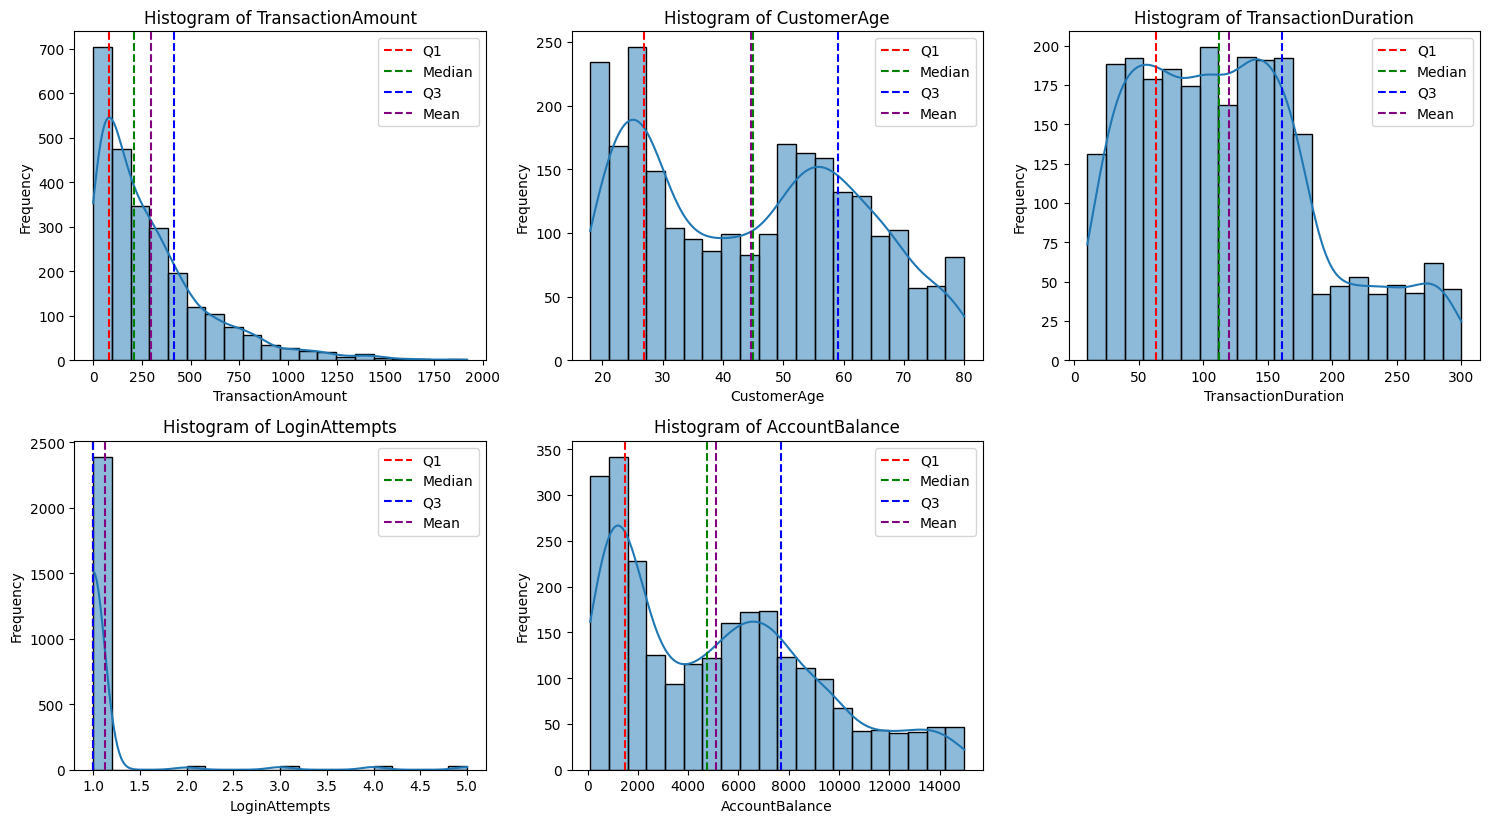

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
axes = axes.flatten() 

for i, var in enumerate(numerik):
    q1 = df_original[var].quantile(0.25)
    median = df_original[var].median()
    q3 = df_original[var].quantile(0.75)
    mean = df_original[var].mean()

    sns.histplot(data=df_original, x=var, bins=20, kde=True, ax=axes[i])
    
    axes[i].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    axes[i].axvline(q3, color='blue', linestyle='--', label='Q3')
    axes[i].axvline(mean, color='purple', linestyle='--', label='Mean')

    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(len(numerik), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Variabel `TransactionAmount` dan `LoginAttempts` memiliki distribusi right-skewed yang menandakan adanya outlier atas yang ekstrem.

**Boxplot**

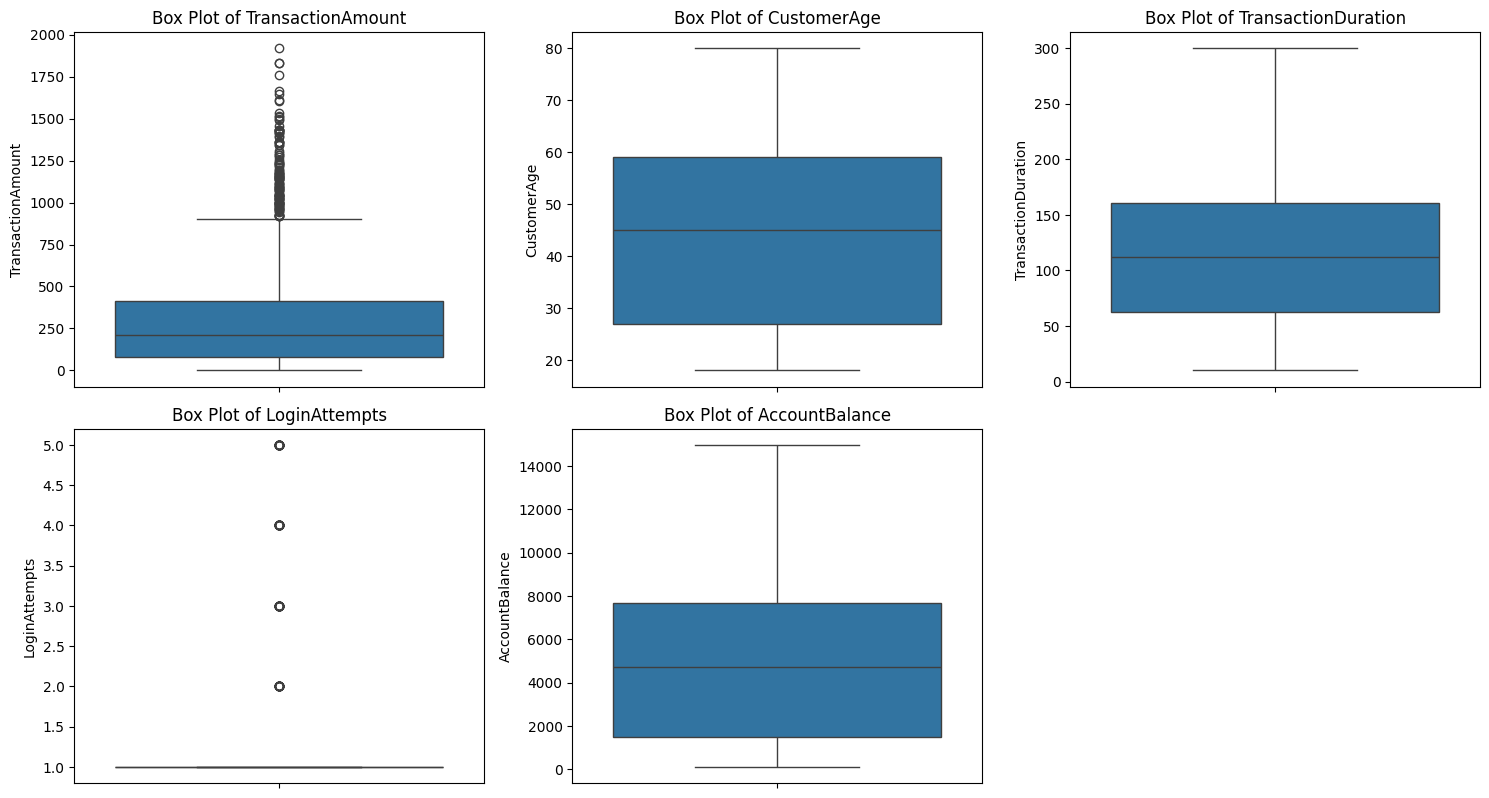

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 
axes = axes.flatten() 

for i, var in enumerate(numerik):
    sns.boxplot(data=df_original, y=var, ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
    axes[i].set_ylabel(var)
    
for j in range(len(numerik), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Seperti yang terlihat dari histogram, variabel `TransactionAmount` dan `LoginAttempts` memiliki outlier atas. Variabel `CustomerAge` memiliki distribusi yang cukup simetris, sementara variabel `TransactionDuration` dan `AccountBalance` cenderung right-skewed.

**Scatter Plot**

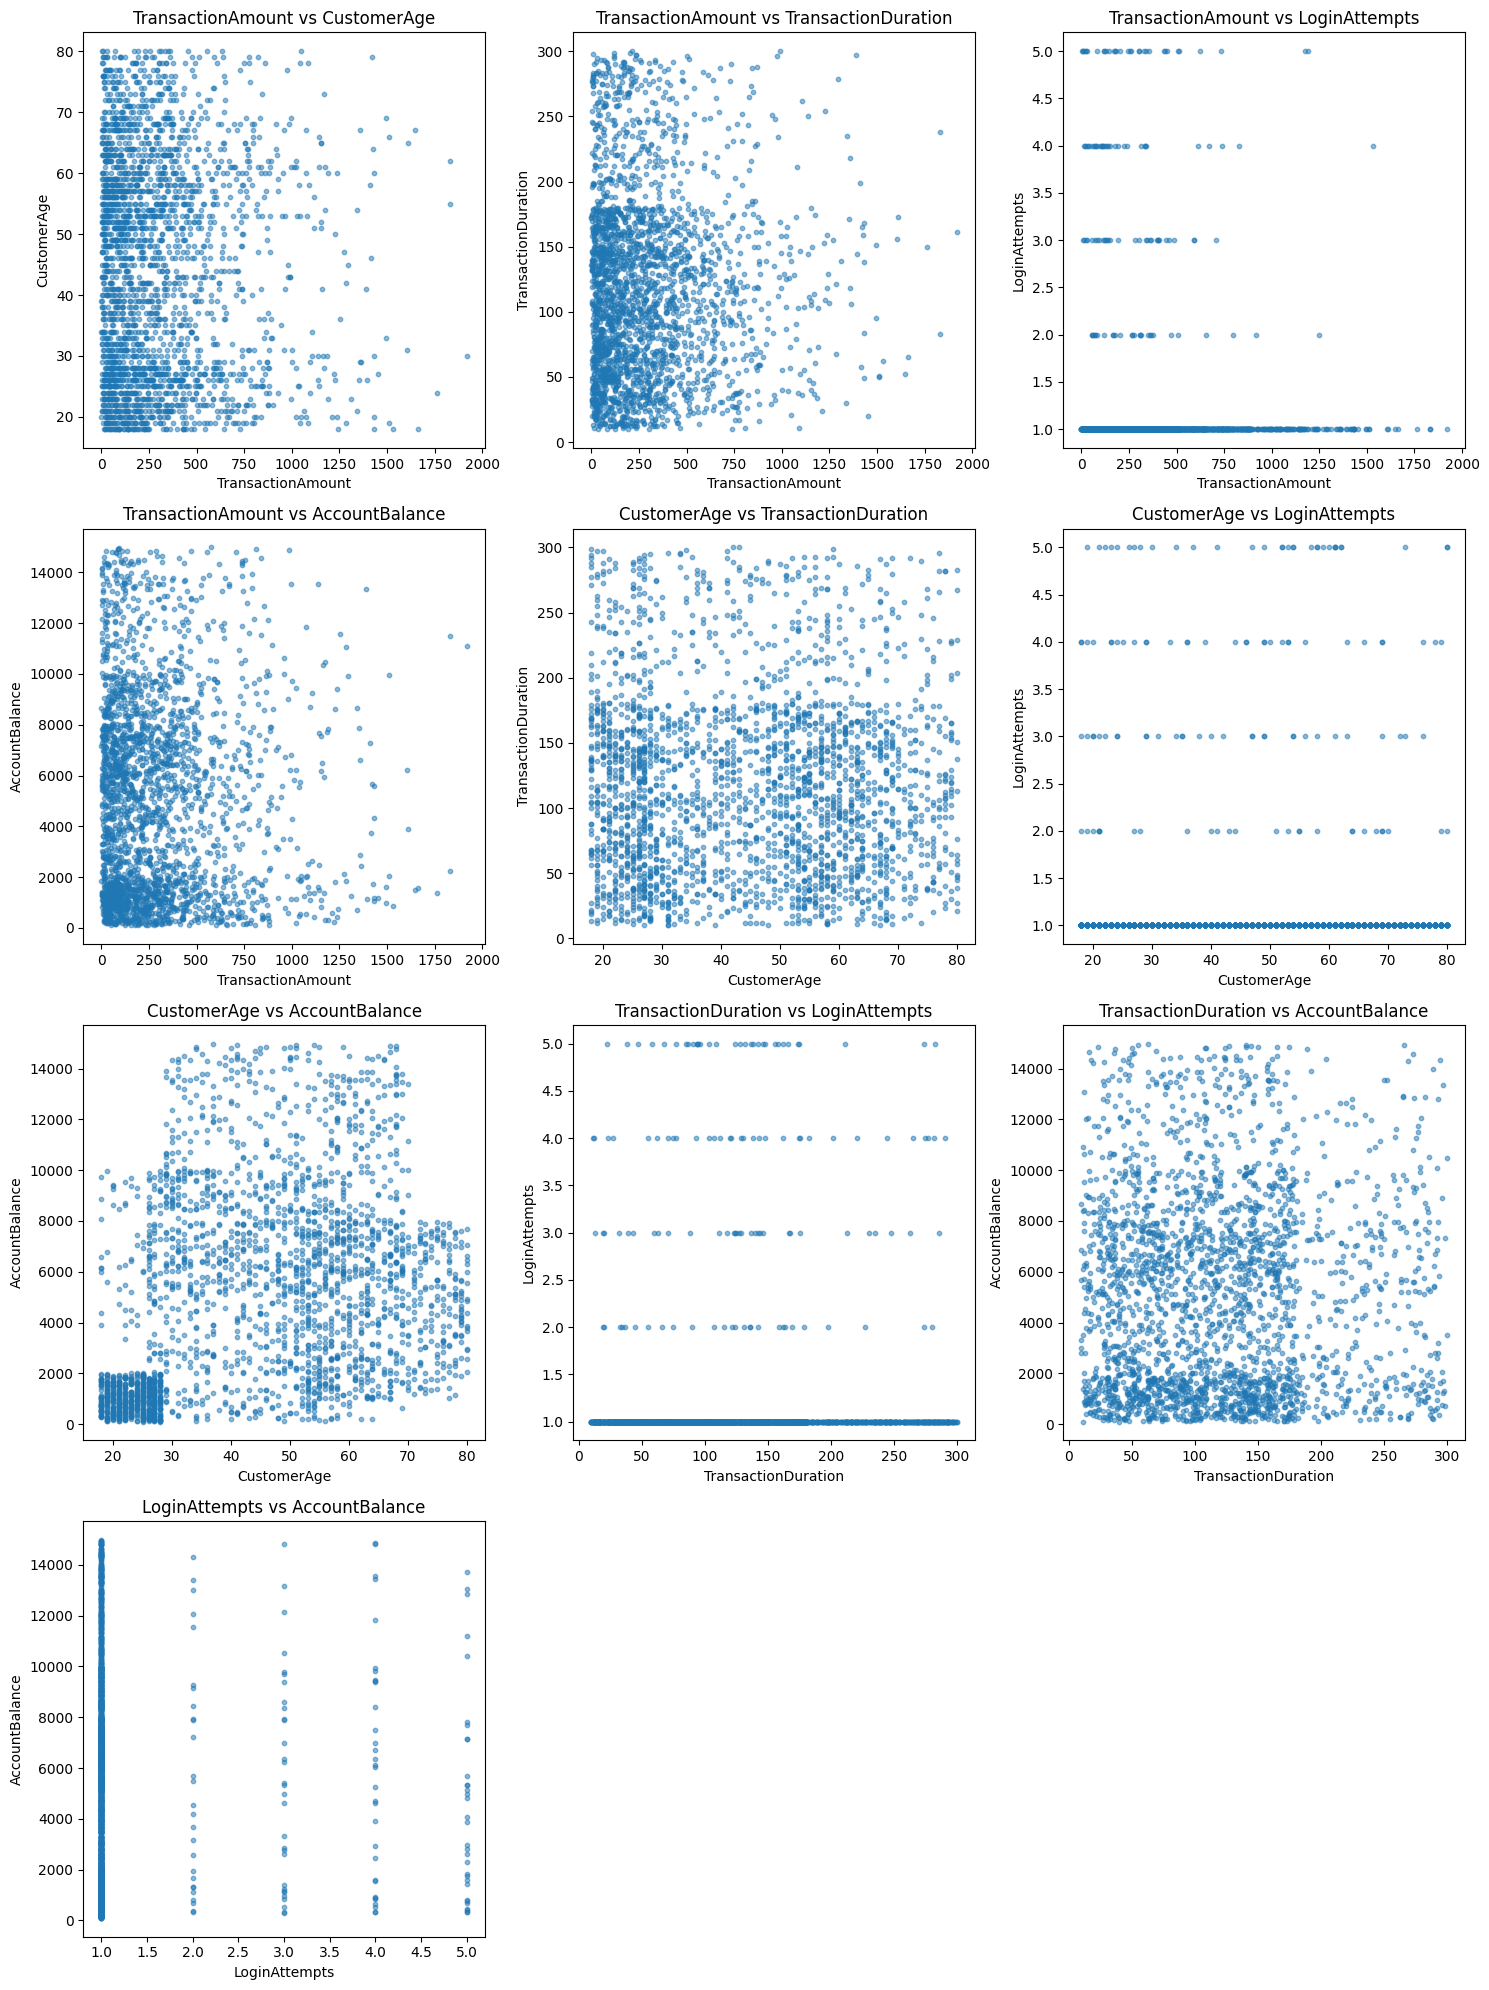

In [14]:
num_pairs = len(numerik) * (len(numerik) - 1) // 2 
cols = 3  
rows = (num_pairs // cols) + (num_pairs % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() 

for ax, (feat_x, feat_y) in zip(axes, itertools.combinations(numerik, 2)):
    ax.scatter(df_original[feat_x], df_original[feat_y], alpha=0.5, s=10)
    ax.set_xlabel(feat_x)
    ax.set_ylabel(feat_y)
    ax.set_title(f'{feat_x} vs {feat_y}')

for i in range(num_pairs, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Hubungan antar variabel numerik cenderung nonlinear.

**Matriks Korelasi**

In [15]:
corr_matrix = df_original[numerik].corr()
corr_matrix

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


Korelasi antar variabel sangat rendah, sehingga tidak terjadi multikolinearitas.

## **4.4 Visualisasi Data**

**Barchart**

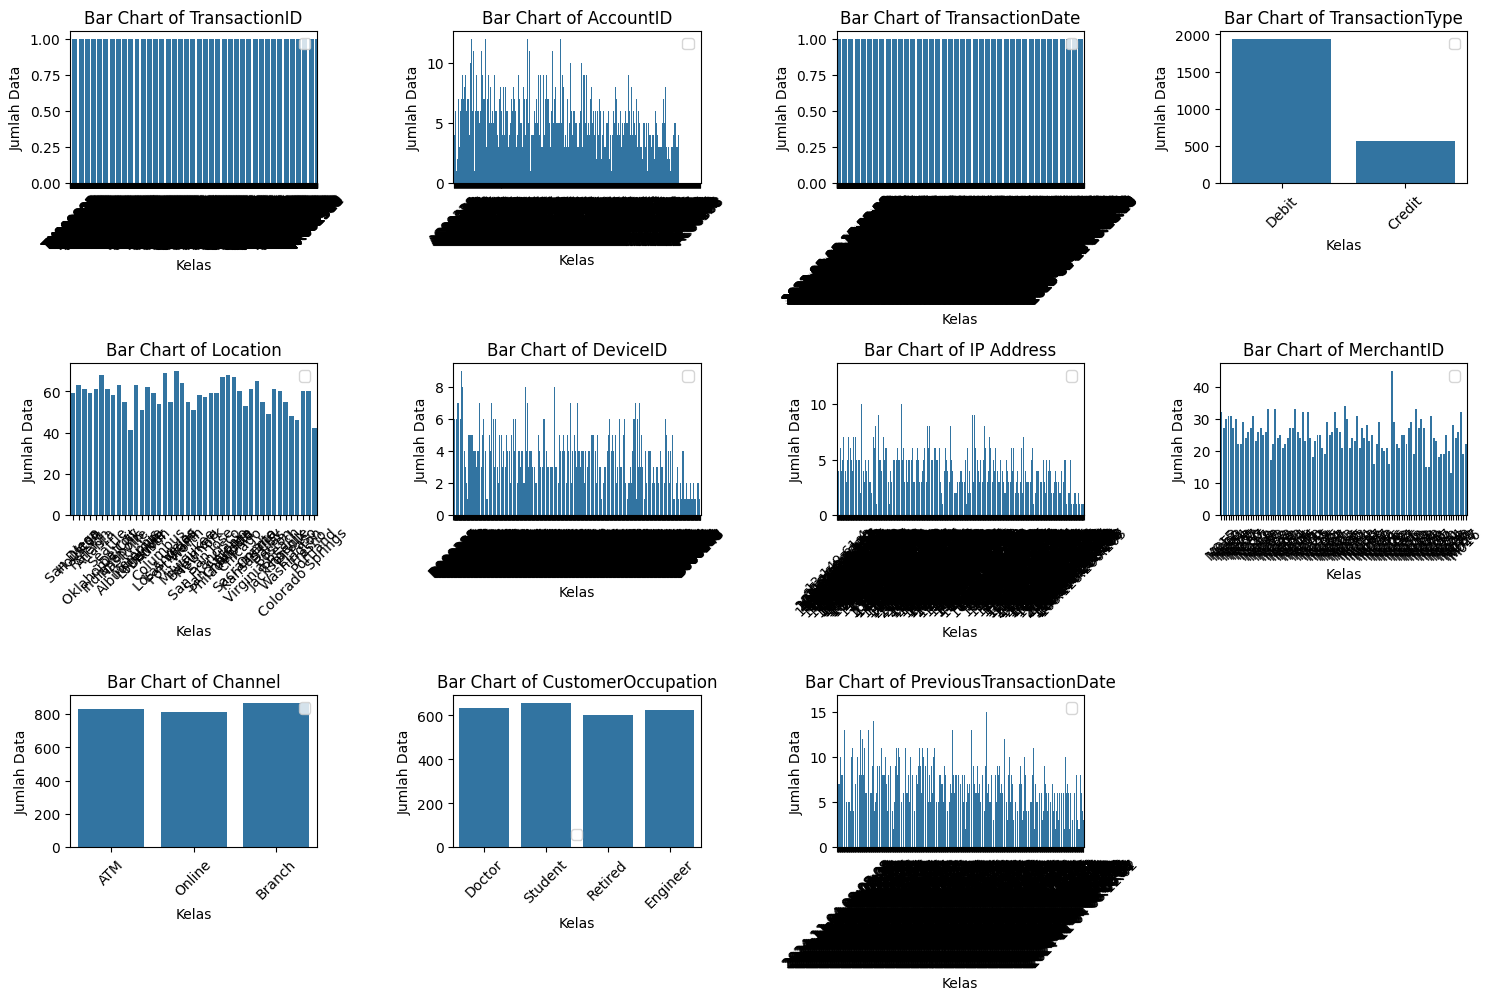

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12)) 
axes = axes.flatten() 

for i, var in enumerate(kategorik):
  sns.countplot(data=df_original, x=var, ax=axes[i])
  axes[i].set_title(f'Bar Chart of {var}')
  axes[i].set_xlabel('Kelas')
  axes[i].set_ylabel('Jumlah Data')
  axes[i].legend()
  axes[i].tick_params(axis='x', rotation=45)
  
for j in range(len(kategorik), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Karena barchart tidak memberikan wawasan berarti pada beberapa variabel, maka akan dipilih beberapa variabel tertentu saja.

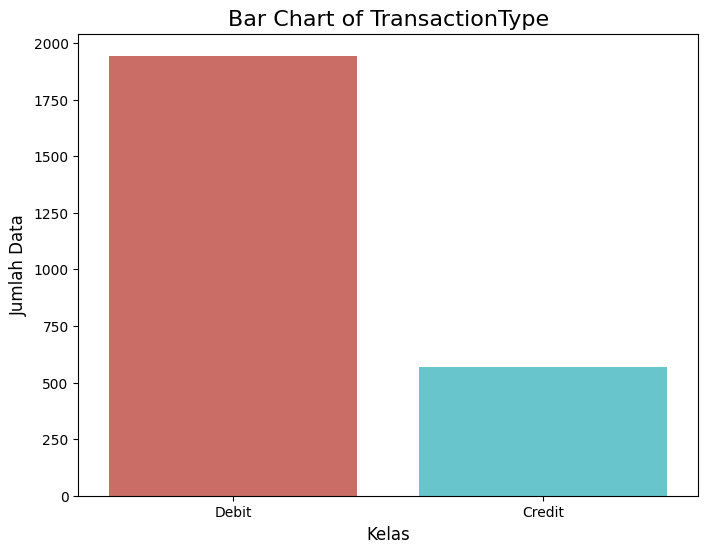

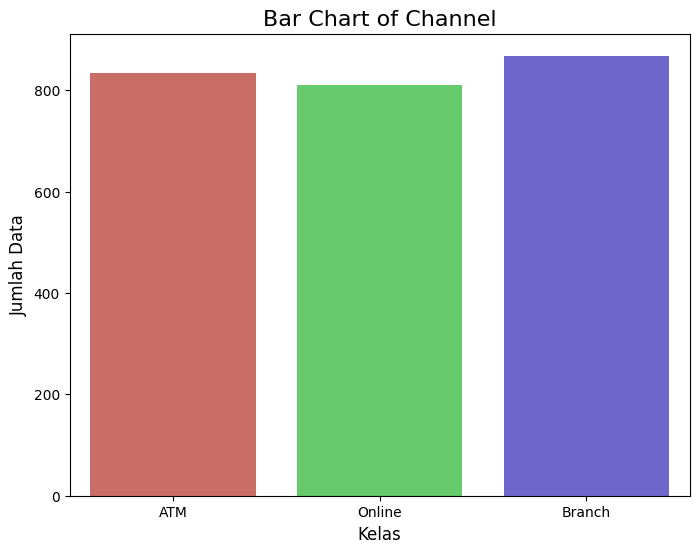

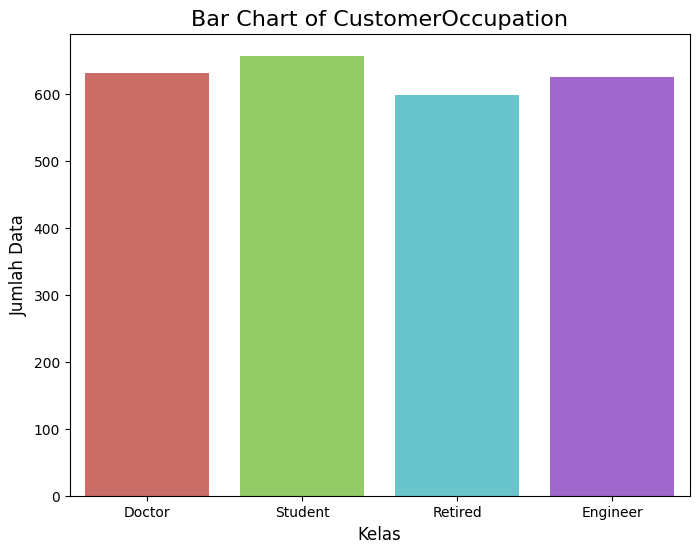

In [17]:
cat = ['TransactionType', 'Channel', 'CustomerOccupation']

for i, var in enumerate(cat):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_original, x=var, palette='hls')
    plt.title(f'Bar Chart of {var}', fontsize=16)
    plt.xlabel('Kelas', fontsize=12)
    plt.ylabel('Jumlah Data', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()

**Pairplot**

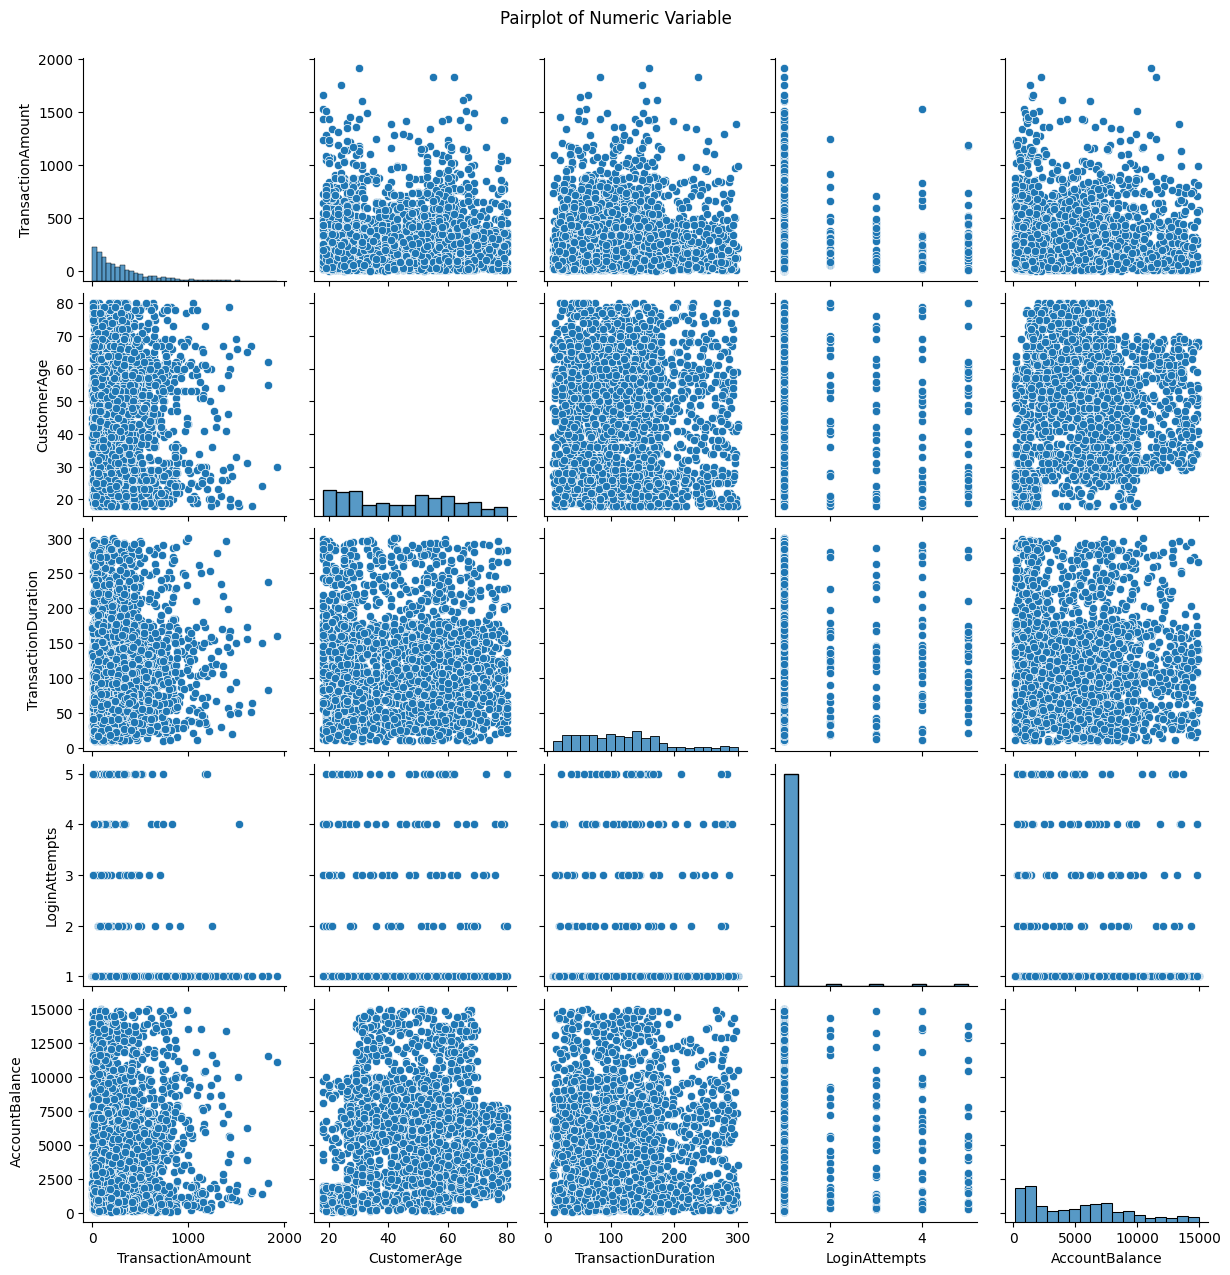

In [18]:
sns.pairplot(df_original[numerik], hue=None, diag_kind='hist')
plt.suptitle('Pairplot of Numeric Variable', y=1.02)
plt.show()

**Heatmap**

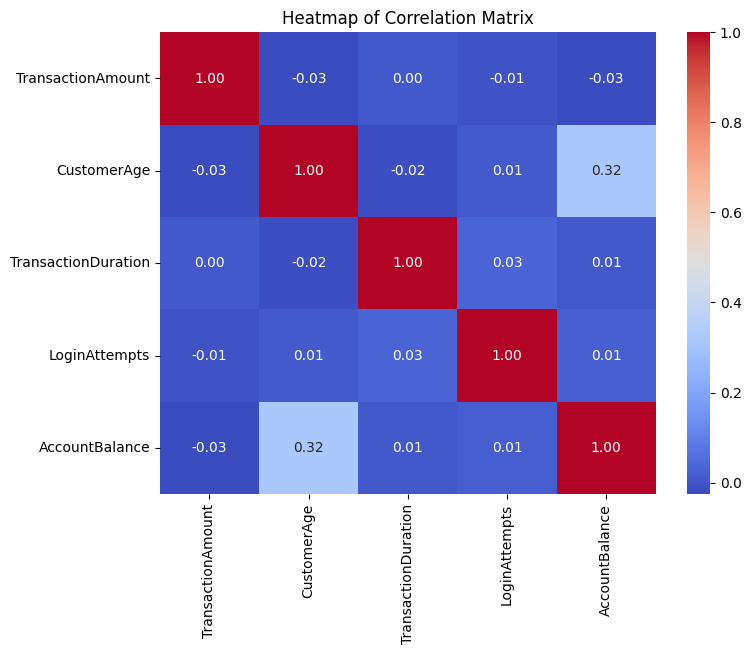

In [19]:
corr_matrix = df_original[numerik].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

Berdasarkan heatmap, terlihat bahwa hubungan antar variabel sangat rendah, dengan hubungan tertinggi adalah `CustomerAge` dan `AccountBalance` dengan korelasi sebesar 0,32.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **5.1 Data Cleaning**

In [20]:
df_clean = df_original.copy()

Akan dihapus fitur yang kurang relevan dalam analisis clustering ini, meliputi fitur ID, `IP Address`, `TransactionDate`, dan `PreviousTransactionDate`.

In [21]:
df_clean = df_clean.drop(columns=[col for col in df_clean.columns if 'ID' in col])
df_clean = df_clean.drop(columns=['IP Address', 'PreviousTransactionDate', 'TransactionDate'])

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB


In [23]:
df_clean.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


In [24]:
numerik = df_clean.select_dtypes(include=['number']).columns.tolist()
kategorik = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", numerik)
print("Fitur Kategorikal:", kategorik)

Fitur Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Fitur Kategorikal: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


## **5.2 Deteksi dan Penanganan Outlier**

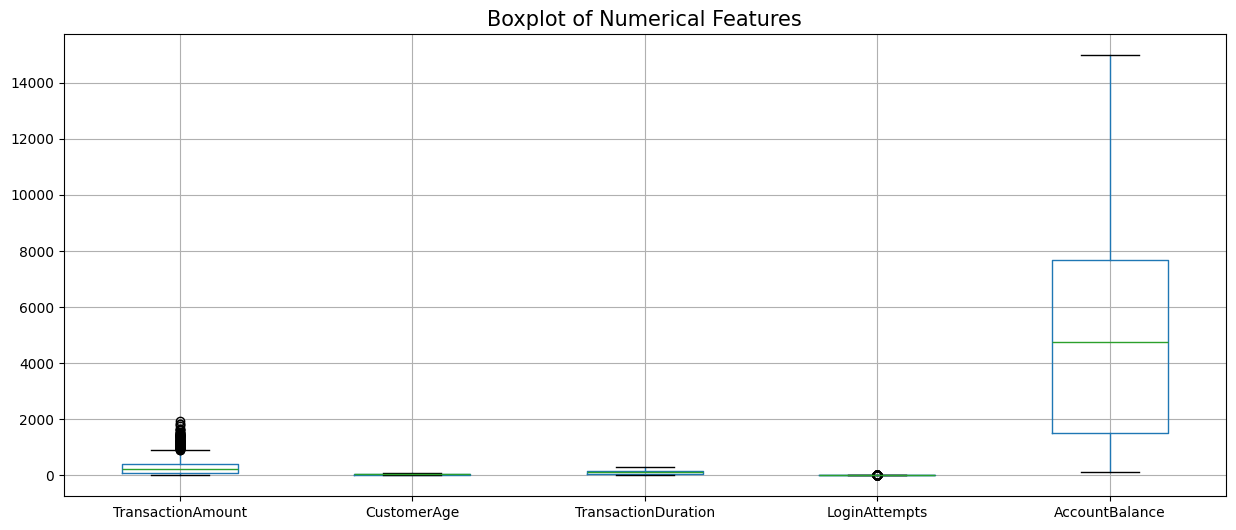

In [25]:
plt.figure(figsize=(15, 6))
df_clean[numerik].boxplot(rot=90)
plt.title("Boxplot of Numerical Features", fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [26]:
Q1 = df_clean[numerik].quantile(0.25)
Q3 = df_clean[numerik].quantile(0.75)
IQR = Q3 - Q1
outliers = (df_clean[numerik] < (Q1 - 1.5 * IQR)) | (df_clean[numerik] > (Q3 + 1.5 * IQR))
print(outliers.sum())

TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


Terdapat 2 variabel yang memiliki outlier yaitu `TransactionAmount` dan `LoginAttempts`. Tetapi, jumlah outlier cukup sedikit dan mungkin menggambarkan informasi penting dari data, sehingga tidak ditangani. 

## **5.3 Encoding Data Kategorik**

In [27]:
for var in kategorik:
    print(df_clean[var].value_counts())
    print('\n')

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          

Variabel akan di-encoding menggunakan One Hot Encoding karena merupakan variabel kategorik nominal. 

In [28]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = onehot_encoder.fit_transform(df_clean[kategorik])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(kategorik))

# Menggabungkan hasil encoding dengan data asli
df_encoded = pd.concat([df_clean.drop(kategorik, axis=1), categorical_encoded], axis=1)
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70,81,1,5112.21,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,376.24,68,141,1,13758.91,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126.29,19,56,1,1122.35,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,184.50,26,25,1,8569.06,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,13.45,26,198,1,7429.40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## **5.4 Feature Scaling**

In [29]:
numerik

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [30]:
scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numerik] = scaler.fit_transform(df_normalized[numerik])

In [31]:
df_normalized.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.007207,0.838710,0.244828,0.0,0.336832,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.195940,0.806452,0.451724,0.0,0.918055,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.065680,0.016129,0.158621,0.0,0.068637,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.096016,0.129032,0.051724,0.0,0.569198,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.006874,0.129032,0.648276,0.0,0.492591,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### **a.1 Pemilihan Algoritma**

In [33]:
# Rentang parameter 
param_grid = {
    'KMeans': {'n_clusters': range(2, 11), 'init': ['k-means++', 'random']},
    'AgglomerativeClustering': {'n_clusters': range(2, 11), 'linkage': ['ward', 'complete', 'average', 'single']}
}

results = []

# Evaluasi setiap algoritma 
for name, algorithm in param_grid.items():
    best_score = -1
    best_davies_bouldin = float('inf') 
    best_params = None

    for params in product(*algorithm.values()):
        param_dict = dict(zip(algorithm.keys(), params))
        model = globals()[name](**param_dict)

        cluster_labels = model.fit_predict(df_normalized)
        
        if len(set(cluster_labels)) > 1:  
            silhouette = silhouette_score(df_normalized, cluster_labels)
            davies_bouldin = davies_bouldin_score(df_normalized, cluster_labels)
            
            # Memilih Silhouette Score terbaik
            if silhouette > best_score:
                best_score = silhouette
                best_davies_bouldin = davies_bouldin
                best_params = param_dict
                
        else:
            silhouette = -1
            davies_bouldin = float('inf') 
            
    results.append({
        'Algorithm': name, 
        'Best Silhouette Score': best_score, 
        'Best Davies-Bouldin Index': best_davies_bouldin,
        'Best Parameters': best_params
    })

model_results = pd.DataFrame(results)
model_results

,Algorithm,Best Silhouette Score,Best Davies-Bouldin Index,Best Parameters
0,KMeans,0.151152,2.303745,"{'n_clusters': 3, 'init': 'random'}"
1,AgglomerativeClustering,0.102299,2.608773,"{'n_clusters': 2, 'linkage': 'complete'}"


Akan dipilih algoritma K-Means karena hasil silhouette score lebih tinggi dan davies-bouldin index lebih rendah.

### **a.2 Pelatihan Model**

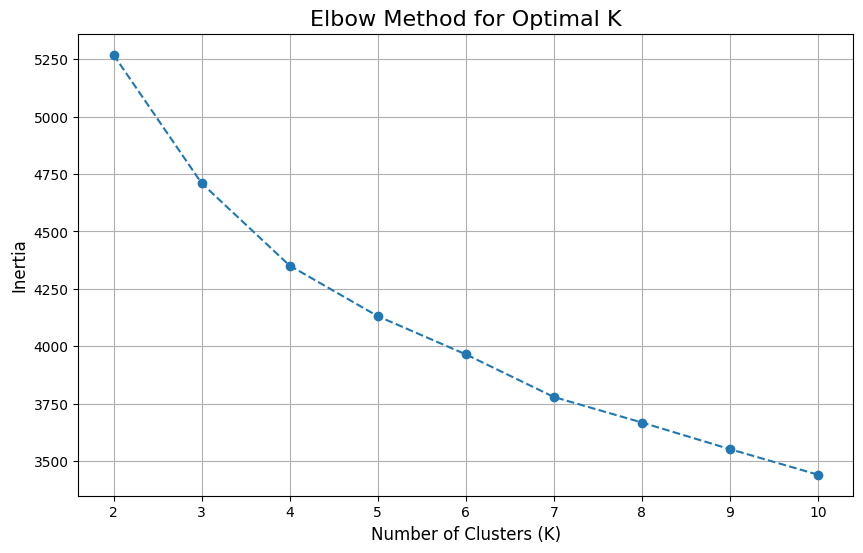

In [34]:
range_clusters = range(2, 11)
inertia = []

# Hitung inertia untuk setiap jumlah cluster
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

Akan dipilih 3 kluster sebagai jumlah kluster terbaik.

In [35]:
kmeans_clustering = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans_clustering.fit_predict(df_normalized)

In [36]:
kmeans_clustering

KMeans(n_clusters=3, n_init=10, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [37]:
score = silhouette_score(df_normalized, cluster_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.1501682546228516


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [38]:
column_names = df_normalized.columns.tolist()
mutual_info = mutual_info_classif(df_normalized, cluster_labels)

mi_df = pd.DataFrame({'Feature': column_names, 
                      'Mutual Information': mutual_info})

# Fitur dengan nilai Mutual Information tertinggi
print("Mutual Information per Feature:")
print(mi_df.sort_values(by='Mutual Information', ascending=False))

Mutual Information per Feature:
                        Feature  Mutual Information
1                   CustomerAge            0.752310
52   CustomerOccupation_Student            0.577673
51   CustomerOccupation_Retired            0.550539
4                AccountBalance            0.411795
50  CustomerOccupation_Engineer            0.201612
44             Location_Seattle            0.015388
6              Location_Atlanta            0.010503
34               Location_Omaha            0.009850
42       Location_San Francisco            0.008822
17             Location_El Paso            0.005783
40         Location_San Antonio            0.005450
29               Location_Miami            0.004825
8            Location_Baltimore            0.004536
22        Location_Jacksonville            0.004427
16             Location_Detroit            0.004253
5         TransactionType_Debit            0.004130
46      Location_Virginia Beach            0.004042
19              Location_Fresno 

Akan dipilih fitur dengan Mutual Information tertinggi.

In [39]:
# Pilih fitur dengan Mutual Information tertinggi
selected_features = mi_df.sort_values(by='Mutual Information', ascending=False).head(5)['Feature'].values
print(f"Fitur yang dipilih: {selected_features}")

Fitur yang dipilih: ['CustomerAge' 'CustomerOccupation_Student' 'CustomerOccupation_Retired'
 'AccountBalance' 'CustomerOccupation_Engineer']


Karena nilai Mutual Information hanya tinggi untuk beberapa fitur, akan ditambahkan fitur yang dapat menambah insight.

Fitur Terpilih:
- `TransactionAmount` dan `AccountBalance` memberi informasi mengenai aktivitas finansial dan kapasitas pengeluaran.
- `CustomerAge` dan `CustomerOccupation` memberi informasi demografis pelanggan.
- `TransactionDuration` memberi informasi mengenai perilaku dalam bertransaksi, yang membedakan antara pembelian cepat dan transaksi yang lebih lama.

Untuk memudahkan interpretasi hasil clustering, df_selected diambil dari df_clean dan akan dilakukan proses encoding dan scaling.

In [40]:
selected = [col for col in df_clean.columns if 'CustomerOccupation' in col or 'CustomerAge' in col or 'AccountBalance' in col or 'TransactionAmount' in col or 'TransactionDuration' in col]
df_selected = df_clean[selected]

In [41]:
df_selected.head()

,TransactionAmount,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,14.09,70,Doctor,81,5112.21
1,376.24,68,Doctor,141,13758.91
2,126.29,19,Student,56,1122.35
3,184.50,26,Student,25,8569.06
4,13.45,26,Student,198,7429.40


In [42]:
numerik_selected = df_selected.select_dtypes(include=['number']).columns.tolist()
kategorik_selected = df_selected.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", numerik_selected)
print("Fitur Kategorikal:", kategorik_selected)

Fitur Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
Fitur Kategorikal: ['CustomerOccupation']


In [43]:
onehot_encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = onehot_encoder.fit_transform(df_selected[kategorik_selected])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(kategorik_selected))

df_encoded_selected = pd.concat([df_selected.drop(kategorik_selected, axis=1), categorical_encoded_df], axis=1)
df_encoded_selected.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70,81,5112.21,1.0,0.0,0.0,0.0
1,376.24,68,141,13758.91,1.0,0.0,0.0,0.0
2,126.29,19,56,1122.35,0.0,0.0,0.0,1.0
3,184.50,26,25,8569.06,0.0,0.0,0.0,1.0
4,13.45,26,198,7429.40,0.0,0.0,0.0,1.0


In [44]:
scaler = MinMaxScaler()
df_normalized_selected = df_encoded_selected.copy()
df_normalized_selected[numerik_selected] = scaler.fit_transform(df_normalized_selected[numerik_selected])

In [45]:
kmeans_clustering_selected = KMeans(n_clusters=3, random_state=42)
cluster_labels_selected = kmeans_clustering_selected.fit_predict(df_normalized_selected)

In [46]:
score_selected = silhouette_score(df_normalized_selected, cluster_labels_selected)
print(f"Silhouette Score setelah seleksi fitur: {score_selected}")

Silhouette Score setelah seleksi fitur: 0.5256444101413393


Setelah feature selection, silhouette score meningkat menjadi sekitar 0,53.

Kemudian, dilakukan dimensionality reduction untuk mengurangi dimensi data.

In [47]:
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_normalized_selected)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

df_pca.head()

,PC1,PC2
0,-0.534689,-0.573927
1,-0.680148,-0.719578
2,0.944854,0.022305
3,0.758101,-0.074287
4,0.781841,-0.062552


In [48]:
kmeans_clustering_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans_clustering_pca.fit_predict(df_pca)

In [49]:
score_pca = silhouette_score(df_pca, cluster_labels_pca)
print(f"Silhouette Score setelah PCA: {score_pca}")

Silhouette Score setelah PCA: 0.7549795850518959


Silhouette score meningkat menjadi 0,75 setelah PCA.

In [50]:
evaluation = pd.DataFrame({
    'Stage' : ['Initial', 'After Feature Selection', 'After PCA'],
    'Silhouette Score' : [score, score_selected, score_pca]
})

evaluation


,Stage,Silhouette Score
0,Initial,0.150168
1,After Feature Selection,0.525644
2,After PCA,0.754980


Setelah proses feature selection dan PCA, terlihat bahwa nilai Silhouette Score meningkat hingga mencapai 0,75.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

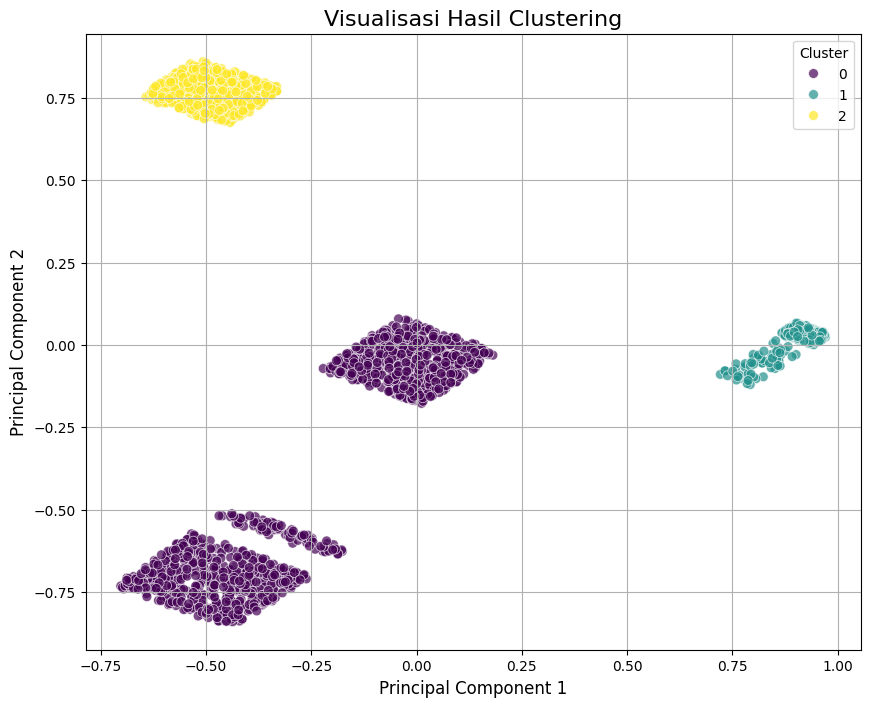

In [68]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=cluster_labels_pca, palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Hasil Clustering', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

Dari visualisasi di atas, terlihat bahwa cluster sangat terpisah dan tidak ada data noise di antara cluster. Nama cluster selanjutnya akan ditambah 1, sehingga cluster 0 menjadi cluster 1, cluster 1 menjadi cluster 2, dan cluster 2 menjadi cluster 3.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [64]:
df_normalized_selected['Cluster'] = cluster_labels_pca
df_normalized_selected['Cluster'] = df_normalized_selected['Cluster'] + 1

In [65]:
df_normalized_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   CustomerAge                  2512 non-null   float64
 2   TransactionDuration          2512 non-null   float64
 3   AccountBalance               2512 non-null   float64
 4   CustomerOccupation_Doctor    2512 non-null   float64
 5   CustomerOccupation_Engineer  2512 non-null   float64
 6   CustomerOccupation_Retired   2512 non-null   float64
 7   CustomerOccupation_Student   2512 non-null   float64
 8   Cluster                      2512 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 166.9 KB


In [54]:
inverse_encoding = onehot_encoder.inverse_transform(categorical_encoded)

In [55]:
df_inverse = df_normalized_selected.copy()
df_inverse['CustomerOccupation'] = inverse_encoding[:, 0]
df_inverse.drop(columns=[col for col in df_inverse.columns if 'CustomerOccupation_' in col], inplace=True)

In [56]:
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster,CustomerOccupation
0,0.007207,0.838710,0.244828,0.336832,1,Doctor
1,0.195940,0.806452,0.451724,0.918055,1,Doctor
2,0.065680,0.016129,0.158621,0.068637,2,Student
3,0.096016,0.129032,0.051724,0.569198,2,Student
4,0.006874,0.129032,0.648276,0.492591,2,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [57]:
numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
df_inverse[numerik] = scaler.inverse_transform(df_normalized_selected[numerik])

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster,CustomerOccupation
0,14.09,70.0,81.0,5112.21,1,Doctor
1,376.24,68.0,141.0,13758.91,1,Doctor
2,126.29,19.0,56.0,1122.35,2,Student
3,184.50,26.0,25.0,8569.06,2,Student
4,13.45,26.0,198.0,7429.40,2,Student


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [58]:
numeric_columns = df_inverse.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != 'Cluster']
categorical_columns = df_inverse.select_dtypes(include=['object', 'category']).columns

In [59]:
num_mean = df_inverse.groupby('Cluster')[numeric_columns].mean()
num_minmax = df_inverse.groupby('Cluster')[numeric_columns].agg(['min', 'max'])
cat = df_inverse.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0])

In [60]:
print("Karakteristik Numerik (Mean):")
num_mean

Karakteristik Numerik (Mean):


,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
Cluster,,,,
1,290.878877,46.131369,120.273089,7241.042229
2,313.220746,23.068493,120.652968,1570.209985
3,294.533673,65.315526,117.215359,4542.157012


In [61]:
print("\nKarakteristik Numerik (Min & Max):")
num_minmax


Karakteristik Numerik (Min & Max):


TransactionAmount          CustomerAge       TransactionDuration  \
                      min      max         min   max                 min   
Cluster                                                                    
1                    0.32  1919.11        26.0  70.0                10.0   
2                    0.26  1762.28        18.0  28.0                11.0   
3                    1.21  1647.74        51.0  80.0                11.0   

               AccountBalance            
           max            min       max  
Cluster                                  
1        300.0         112.76  14977.99  
2        299.0         101.25   9963.39  
3        296.0        1006.12   7996.70

In [62]:
print("\nKarakteristik Kategorik (Modus):")
cat


Karakteristik Kategorik (Modus):


,CustomerOccupation
Cluster,
1,Doctor
2,Student
3,Retired


Hasil Interpretasi:

## Cluster 1:
- **Rata-rata** 
  - **TransactionAmount ($)**: 290,88
  - **CustomerAge (tahun)**: 46,13
  - **TransactionDuration (detik)**: 120,27
  - **AccountBalance ($)**: 7241,04
- **Min-Max**
  - **TransactionAmount ($)**: (min = 0,32 | max = 1919,11)
  - **CustomerAge (tahun)**: (min = 26 | max = 70)
  - **TransactionDuration (detik)**: (min = 10 | max = 300)
  - **AccountBalance ($)**: (min = 112,76 | max = 14977,99)
- **Pekerjaan Mayoritas**: Doctor
- **Analisis**: Cluster ini terdiri dari pelanggan dengan transaksi rata-rata yang lebih rendah dari cluster lain, serta usia rata-rata di kisaran 46 tahun. Durasi transaksi relatif konsisten dengan cluster lainnya, tetapi saldo akun mereka adalah yang tertinggi di antara cluster lainnya. Rentang jumlah transaksi yang sangat besar (dari 0,32 hingga 1919,11) menunjukkan bahwa meskipun rata-rata transaksi mereka lebih rendah, terdapat pelanggan dengan transaksi yang jauh lebih besar. Rentang saldo akun yang luas (112,76 hingga 14977,99) menunjukkan variasi besar, dengan sebagian besar pelanggan memiliki saldo tinggi, tetapi ada beberapa dengan saldo yang lebih rendah. Mayoritas pelanggan dalam cluster ini adalah dokter, yang menunjukkan bahwa mereka memiliki pekerjaan dengan penghasilan yang lebih tinggi. Hal ini mungkin mencerminkan pelanggan yang lebih mapan secara finansial dan kebutuhan stabil. Mereka mungkin tertarik pada produk investasi atau pinjaman profesional yang disesuaikan dengan kebutuhan finansial mereka yang lebih stabil.

## Cluster 2:
- **Rata-rata** 
  - **TransactionAmount ($)**: 313,22
  - **CustomerAge (tahun)**: 23,07
  - **TransactionDuration (detik)**: 120,65
  - **AccountBalance ($)**: 1570,21
- **Min-Max**
  - **TransactionAmount ($)**: (min = 0,26 | max = 1726,28)
  - **CustomerAge (tahun)**: (min = 18 | max = 28)
  - **TransactionDuration (detik)**: (min = 11 | max = 299)
  - **AccountBalance ($)**: (min = 101,25 | max = 9963,39)
- **Pekerjaan Mayoritas**: Student
- **Analisis**: Cluster ini terdiri dari pelanggan yang lebih muda, dengan rata-rata usia sekitar 23 tahun, dan memiliki saldo akun yang lebih rendah. Hal ini menunjukkan bahwa mereka mungkin baru mulai bekerja atau masih berstatus sebagai mahasiswa. Rentang jumlah transaksi (dari 0,26 hingga 1762,28) menunjukkan bahwa meskipun sebagian besar transaksi mereka kecil, ada beberapa transaksi yang jauh lebih besar, mungkin untuk keperluan pendidikan atau pembelian barang besar. Saldo akun yang lebih rendah (101,25 hingga 9963,39) menunjukkan sebagian besar pelanggan dengan saldo yang terbatas, tetapi ada beberapa pelanggan dengan saldo yang cukup besar. Rata-rata transaksi mereka paling tinggi mungkin karena mereka cenderung menghabiskan uang untuk pendidikan atau kebutuhan sehari-hari lainnya. Produk atau layanan yang relevan untuk cluster ini mungkin terkait dengan pembiayaan pendidikan, pinjaman mahasiswa, atau produk-produk yang berfokus pada pengelolaan keuangan untuk orang muda.

## Cluster 3:
- **Rata-rata** 
  - **TransactionAmount ($)**: 294,53
  - **CustomerAge (tahun)**: 65,32
  - **TransactionDuration (detik)**: 117,22
  - **AccountBalance ($)**: 4542,16
- **Min-Max**
  - **TransactionAmount ($)**: (min = 1,21 | max = 1647,74)
  - **CustomerAge (tahun)**: (min = 51 | max = 80)
  - **TransactionDuration (detik)**: (min = 11 | max = 296)
  - **AccountBalance ($)**: (min = 1006,12 | max = 7996,70)
- **Pekerjaan Mayoritas**: Retired
- **Analisis**: CCluster ini terdiri dari pelanggan yang lebih tua, dengan rata-rata usia sekitar 65 tahun. Mereka memiliki saldo akun yang stabil, yang mungkin mencerminkan penghasilan pensiun yang lebih rendah atau pengelolaan keuangan yang lebih konservatif. Rentang jumlah transaksi (dari 1,21 hingga 1647,74) menunjukkan bahwa meskipun rata-rata transaksi mereka lebih rendah dibandingkan dengan cluster lain, ada beberapa transaksi yang lebih besar. Rentang saldo akun (1006,12 hingga 7996,70) menunjukkan saldo mereka stabil, tidak terlalu rendah maupun tinggi. Durasi transaksi mereka sedikit lebih rendah dengan jumlah transaksi tidak terlalu tinggi, yang mungkin menunjukkan transaksi yang lebih cepat atau lebih rutin. Mayoritas dalam cluster ini sudah pensiun, yang menunjukkan bahwa mereka mengandalkan dana pensiun mereka untuk kebutuhan sehari-hari. Mereka mungkin tertarik pada produk-produk perencanaan pensiun atau layanan keuangan yang berfokus pada pengelolaan dana pensiun.


Hasil clustering sesuai dengan ekspektasi dan logika bisnis. Setiap cluster menunjukkan segmen pelanggan yang dapat dikelompokkan berdasarkan karakteristik yang relevan seperti usia, pekerjaan, dan saldo akun. Selain itu, terdapat pola yang berguna untuk pemasaran dan strategi produk, yang memungkinkan perusahaan untuk merancang penawaran dan layanan yang dipersonalisasi dengan setiap segmen pelanggan.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized_selected.to_csv('Dataset_clustering.csv', index=False)